# ЛР 4

# Интервальные оценки

In [1]:
from random import uniform
from pprint import pprint
from scipy.stats import t, chi2, norm
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Y(x):
    return 2 / (2 + x)

A = -1
B = 5

Теоретическая плотность распределения

In [3]:
def f(x):
    if A <= x <= B:
        return 1 / (B - A)
    else:
        return 0

def g(y):
    return f(2 / y - 2) * (2 / y**2) 

Теоретическая функция распределения

In [4]:
def G(y):
    if y < 2 / 7:
        return 0
    elif y > 2:
        return 1
    else:
        return 1 / 3 * (-(1 / y) + 3.5)

## Доверительный интервал для математического ожидания СВ

In [5]:
arrange = np.arange(0.0, 1.01, 0.01)[1:-1]

# Сформировать выборку из n случайных чисел.
def get_x_values(n):
    X = sorted(round(uniform(0, 1) * (B - A) + A, 4) for _ in range(n))
    x_list = sorted([round(Y(X[i]), 4) for i in range(n)])
    return x_list

# Найти точечную оценку математического ожидания.
def mat_exp(x_list, n):
    return sum(x_list) / n

# Найте точечную оценку дисперсии СВ.
def disp(x_list, n, mx):
     return 1 / (n - 1) * sum((x - mx)**2 for x in x_list)
    
# Найти доверительный интервал для оценки мат ожидания для различных уровней значимости

# неизвестная дисперсия
def e_get_intervals(n, mx, disp, alpha=None):
    intervals = []
    if alpha is None:
        for i in arrange:
            cof = np.sqrt(disp) * t.ppf(1 - i / 2, n - 1) / np.sqrt(n - 1)
            intervals.append((mx - cof, mx + cof))
        return intervals
    else:
        cof = np.sqrt(disp) * t.ppf(1 - alpha / 2, n - 1) / np.sqrt(n - 1)
        return mx - cof, mx + cof

# известная дисперсия
def t_get_intervals(n, mx, disp, alpha=None):
    intervals = []
    if alpha is None:
        for i in arrange:
            cof = np.sqrt(disp) * norm.ppf(1 - i / 2) / np.sqrt(n - 1)
            intervals.append((mx - cof, mx + cof))
        return intervals
    else:
        cof = np.sqrt(disp) * norm.ppf(1 - alpha / 2) / np.sqrt(n - 1)
        return mx - cof, mx + cof

Сформировать выборку из 20 случайных чисел.

In [6]:
n = 20
x_list = get_x_values(n)
print(x_list)

[0.2901, 0.3059, 0.4175, 0.4486, 0.5497, 0.57, 0.5823, 0.6716, 0.6876, 0.706, 0.752, 0.7532, 0.7541, 0.7728, 0.8024, 1.0014, 1.0366, 1.0583, 1.0872, 1.4112]


Найти точечную оценку математического ожидания.

In [7]:
mx = mat_exp(x_list, n)
mx

0.732925

Найте точечную оценку дисперсии СВ.

In [8]:
known_disp = disp(x_list, n, mx)
known_disp

0.07955241881578946

Найти доверительный интервал для оценки мат ожидания для различных уровней значимости

In [9]:
e_intervals = e_get_intervals(n, mx, known_disp)

График зависимости велечины доверительного интервала от уровня значимости 

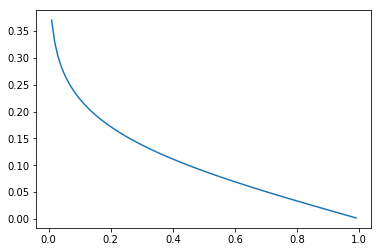

In [10]:
x_plot = arrange[:]
y_plot = [j - i for i, j in e_intervals]
plt.plot(x_plot, y_plot)
plt.show()

Найти теоретическое значение дисперсии СВ по известной плотности распределения

In [11]:
t_mx = 0.65
t_dx = 0.15
t_dx
#вбить подсчеты с листика

0.15

Найти доверительный интервал для оценки мат ожидания при известной дисперсии для различных уровней значимости

In [12]:
t_intervals = t_get_intervals(n, mx, t_dx)

График зависимости велечины доверительного интервала от уровня значимости 

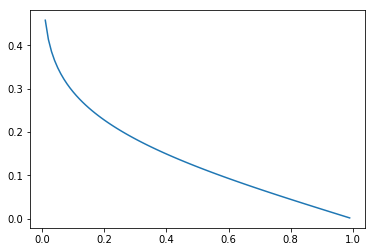

In [13]:
x_plot = arrange[:]
y_plot = [j - i for i, j in t_intervals]
plt.plot(x_plot, y_plot)
plt.show()

Сравнить результаты

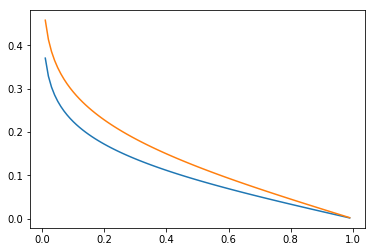

In [14]:
x_plot = arrange[:]
y_plot_e = [j - i for i, j in e_intervals]
y_plot_t = [j - i for i, j in t_intervals]
plt.plot(x_plot, y_plot_e)
plt.plot(x_plot, y_plot_t)
plt.show()

Размер выборки: 30
Мат ожидание: 0.6799366666666666
Дисперсия: 0.1776396741264368


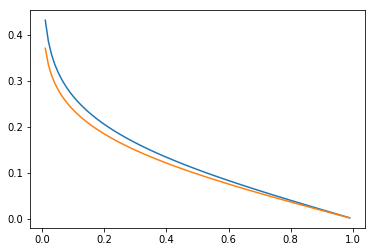

Размер выборки: 50
Мат ожидание: 0.5505159999999999
Дисперсия: 0.10164399157551023


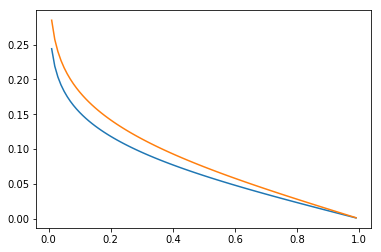

Размер выборки: 70
Мат ожидание: 0.7577685714285713
Дисперсия: 0.23828529001242235


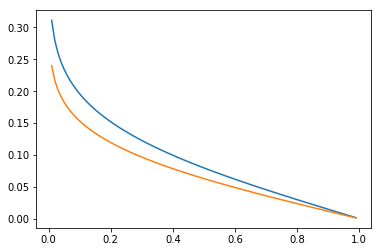

Размер выборки: 100
Мат ожидание: 0.5940210000000001
Дисперсия: 0.1110901036959596


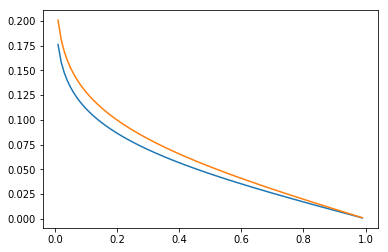

Размер выборки: 150
Мат ожидание: 0.6359226666666667
Дисперсия: 0.15536523223445192


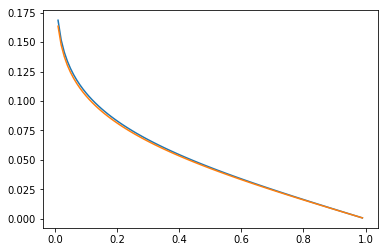

In [15]:
n_list = [30, 50, 70, 100, 150]
mx_list = []
dx_list = []
e_intervals_list = []
t_intervals_list = []
len_intervals_e = []
len_intervals_t = []
for n in n_list:
    print(f"Размер выборки: {n}")
    x_list = get_x_values(n)
    mx_list.append(mat_exp(x_list, n))
    dx_list.append(disp(x_list, n, mx_list[-1]))
    e_intervals_list.append(e_get_intervals(n, mx_list[-1], dx_list[-1]))
    t_intervals_list.append(t_get_intervals(n, mx_list[-1], t_dx))
    print(f"Мат ожидание: {mx_list[-1]}")
    print(f"Дисперсия: {dx_list[-1]}")
    x_plot = arrange[:]
    len_intervals_e.append([j - i for i, j in e_intervals_list[-1]])
    len_intervals_t.append([j - i for i, j in t_intervals_list[-1]])
    plt.plot(x_plot, len_intervals_e[-1])
    plt.plot(x_plot, len_intervals_t[-1])
    plt.show()  

Графики зависимости величины доверительного интервала от объема выборки

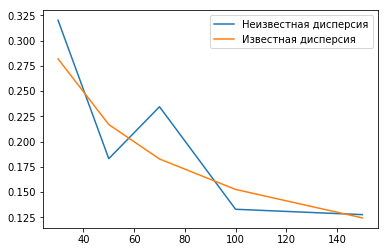

In [16]:
y_plot_e = []
len_y_plot_e = []
y_plot_t = []
len_y_plot_t = []
for i, n in enumerate(n_list):
    y_plot_e.append(e_get_intervals(n, mx_list[i], dx_list[i], alpha=0.05))
    left, right = y_plot_e[-1]
    len_y_plot_e.append(right - left)
    y_plot_t.append(t_get_intervals(n, mx_list[i], t_dx, alpha=0.05))
    left, right = y_plot_t[-1]
    len_y_plot_t.append(right - left)
plt.plot(n_list, len_y_plot_e)
plt.plot(n_list, len_y_plot_t)
plt.legend(('Неизвестная дисперсия', 'Известная дисперсия'))
plt.show()

## Доверительный интервал для дисперсии СВ

In [17]:
# Доверительный интервал для оценки дисперсии для различных уровней значимости

# известнаое мат ожидание
def t_dx_intervals(x_list, n, mx, alpha=None):
    intervals = []
    disper = disp(x_list, n, mx)
    if alpha is None:
        for i in reversed(arrange):
            left = n * disper / chi2.isf((1 - i) / 2, n)
            right = n * disper / chi2.isf((1 + i) / 2, n)
            intervals.append((left, right))
        return intervals
    else:
        left = n * disper / chi2.isf((1 - alpha) / 2, n)
        right = n * disper / chi2.isf((1 + alpha) / 2, n)
        return left, right

# неизвестное мат ожидание
def e_dx_intervals(x_list, n, mx, alpha=None):
    intervals = []
    disper = disp(x_list, n, mx)
    if alpha is None:
        for i in reversed(arrange):
            left = n * disper / chi2.isf((1 - i) / 2, n - 1)
            right = n * disper / chi2.isf((1 + i) / 2, n - 1)
            intervals.append((left, right))
        return intervals
    else:
        left = n * disper / chi2.isf((1 - alpha) / 2, n - 1)
        right = n * disper / chi2.isf((1 + alpha) / 2, n - 1)
        return left, right    

Сформировать выборку из 20 случайных чисел.

In [18]:
n = 20
x_list = get_x_values(n)
print(x_list)

[0.2924, 0.3027, 0.3083, 0.3147, 0.3222, 0.3357, 0.3455, 0.3529, 0.3852, 0.4495, 0.464, 0.4661, 0.4916, 0.5227, 0.5906, 0.6337, 0.7159, 0.8068, 0.9143, 0.9363]


Найти точечную оценку математического ожидания.

In [19]:
mx = mat_exp(x_list, n)
mx

0.497555

Найте точечную оценку дисперсии СВ.

In [20]:
dx = disp(x_list, n, mx)
dx

0.0423522152368421

Найти доверительный интервал для оценки дисперсии для различных уровней значимости

In [21]:
e_intervals = e_dx_intervals(x_list, n, mx)

График зависимости велечины доверительного интервала от уровня значимости 

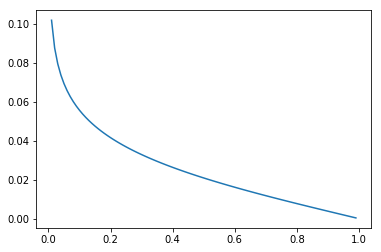

In [22]:
x_plot = arrange[:]
y_plot = [j - i for i, j in e_intervals]
plt.plot(x_plot, y_plot)
plt.show()

Найти доверительный интервал для оценки дисперсии для различных уровней значимости

In [23]:
t_intervals = t_dx_intervals(x_list, n, t_mx)

График зависимости велечины доверительного интервала от уровня значимости 

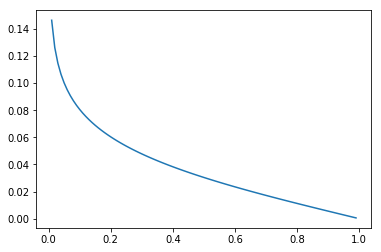

In [24]:
x_plot = arrange[:]
y_plot = [j - i for i, j in t_intervals]
plt.plot(x_plot, y_plot)
plt.show()

Сравнить результаты

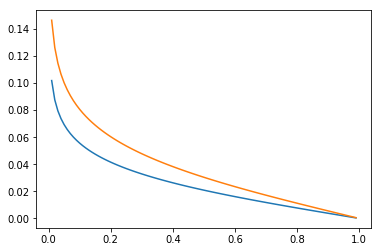

In [25]:
x_plot = arrange[:]
y_plot_e = [j - i for i, j in e_intervals]
y_plot_t = [j - i for i, j in t_intervals]
plt.plot(x_plot, y_plot_e)
plt.plot(x_plot, y_plot_t)
plt.show()

Размер выборки: 30
Мат ожидание: 0.60488
Дисперсия: 0.16442831613793102


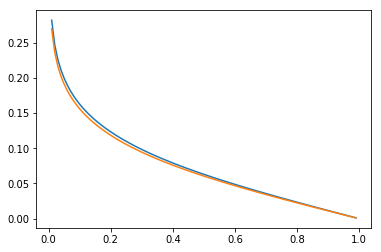

Размер выборки: 50
Мат ожидание: 0.7470779999999998
Дисперсия: 0.19642013726122448


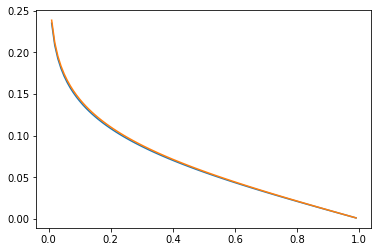

Размер выборки: 70
Мат ожидание: 0.6585128571428571
Дисперсия: 0.18766977736853005


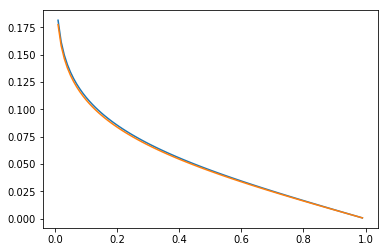

Размер выборки: 100
Мат ожидание: 0.6230929999999999
Дисперсия: 0.10912936611212122


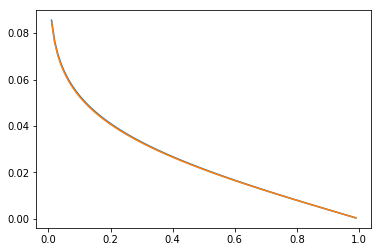

Размер выборки: 150
Мат ожидание: 0.6645033333333337
Дисперсия: 0.15705264260626395


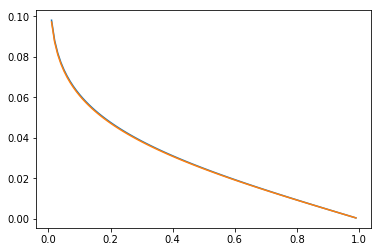

In [26]:
n_list = [30, 50, 70, 100, 150]
mx_list = []
dx_list = []
e_intervals_list = []
t_intervals_list = []
len_intervals_e = []
len_intervals_t = []
for n in n_list:
    print(f"Размер выборки: {n}")
    x_list = get_x_values(n)
    mx_list.append(mat_exp(x_list, n))
    dx_list.append(disp(x_list, n, mx_list[-1]))
    e_intervals_list.append(e_dx_intervals(x_list, n, mx_list[-1]))
    t_intervals_list.append(t_dx_intervals(x_list, n, t_mx))
    print(f"Мат ожидание: {mx_list[-1]}")
    print(f"Дисперсия: {dx_list[-1]}")
    x_plot = arrange[:]
    len_intervals_e.append([j - i for i, j in e_intervals_list[-1]])
    len_intervals_t.append([j - i for i, j in t_intervals_list[-1]])
    plt.plot(x_plot, len_intervals_e[-1])
    plt.plot(x_plot, len_intervals_t[-1])
    plt.show()

Графики зависимости величины доверительного интервала от объема выборки

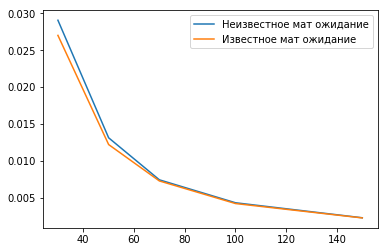

In [27]:
y_plot_e = []
len_y_plot_e = []
y_plot_t = []
len_y_plot_t = []
for i, n in enumerate(n_list):
    y_plot_e.append(e_dx_intervals(x_list, n, mx_list[i], alpha=0.05))
    left, right = y_plot_e[-1]
    len_y_plot_e.append(right - left)
    y_plot_t.append(t_dx_intervals(x_list, n, t_mx, alpha=0.05))
    left, right = y_plot_t[-1]
    len_y_plot_t.append(right - left)
plt.plot(n_list, len_y_plot_e)
plt.plot(n_list, len_y_plot_t)
plt.legend(('Неизвестное мат ожидание', 'Известное мат ожидание'))
plt.show()